In [97]:
from sympy import *
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np


init_printing(use_latex=True)

In [98]:
def ableitung_gemittelt(next_y :int, prev_y :int, h :int):
    return (next_y - prev_y) / (2 * h)

def ableitung_vorwaerts(next_y :int, y :int, h :int):
    return (next_y - y) / h

def ableitung_rueckwaerts(y :int, prev_y :int, h :int):
    return (y - prev_y) / h

In [99]:
def diskrete_ableitung(h:int, discrete_original: list):
    discrete_list = []
    for i in range(len(discrete_original)):
        if i == 0:
            discrete_list.append((discrete_original[i][0], np.round(ableitung_vorwaerts(discrete_original[i+1][1], discrete_original[i][1], h), 4)))
        elif i == len(discrete_original) - 1:
            discrete_list.append((discrete_original[i][0], np.round(ableitung_rueckwaerts(discrete_original[i][1], discrete_original[i-1][1], h), 4)))
        else:
            discrete_list.append((discrete_original[i][0], np.round(ableitung_gemittelt(discrete_original[i+1][1], discrete_original[i-1][1], h), 4)))
    return discrete_list

In [100]:
import matplotlib.pyplot as plt

def plot_multiple_discrete(*args):
    plt.figure(figsize=(8, 4))
    i = 0
    for arg in args:
        # Check if arg is a DataFrame or similar structure
        if hasattr(arg, 'iloc'):
            # Assuming the DataFrame has two columns: x and y
            x = arg.iloc[:, 0]
            y = arg.iloc[:, 1]
        else:
            # Assuming arg is a list of (x, y) tuples
            x, y = zip(*arg)
        
        plt.plot(x, y, "-o", label=f'Derivative {i}')
        i += 1
    
    plt.title('Plot of Discrete Points')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.legend()
    plt.show()



In [101]:
discrete_points = [(0, 0.25), (0.2, -0.25), (0.4, -0.63), (0.6, -0.63), (0.8, -0.25), (1, 0.25), (1.2, 0.71)]

Original [(0, 0.25), (0.2, -0.25), (0.4, -0.63), (0.6, -0.63), (0.8, -0.25), (1, 0.25), (1.2, 0.71)]
Erste Ableitung [(0, -2.5), (0.2, -2.2), (0.4, -0.95), (0.6, 0.95), (0.8, 2.2), (1, 2.4), (1.2, 2.3)]
Zweite Ableitung [(0, 1.5), (0.2, 3.875), (0.4, 7.875), (0.6, 7.875), (0.8, 3.625), (1, 0.25), (1.2, -0.5)]


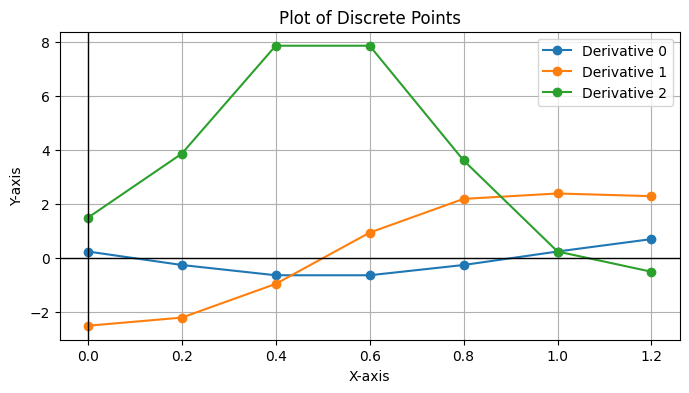

In [102]:
print(f"Original {discrete_points}")
d1 = diskrete_ableitung(0.2, discrete_points)
print(f"Erste Ableitung {d1}")
# d1[0] = (0, 0)
# d1[len(d1) - 1] = (1.2, 0)
d2 = diskrete_ableitung(0.2, d1)
print(f"Zweite Ableitung {d2}")
plot_multiple_discrete(discrete_points, d1, d2)

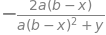

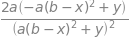

In [103]:
x = sp.symbols('x')
a = sp.symbols('a')
b = sp.symbols('b')
y = sp.symbols('y')

d = ln(a*(x-b)**2 + y)
d1 = d.diff(x)
d2 = d1.diff(x)
display(simplify(d1))
display(simplify(d2))

In [108]:
s1 = solve(d, x) # d = 0
s2 = solve(d1, x) # d' = 0
s3 = solve(d2, x) # d'' = 0
display(s1)
display(s2)
display(s3)

In [110]:
e = ((1-y/0.16) * 0.5 - sp.sqrt((1-y/0.16)*y)/(1-y/0.16))
sp.solve(e, y)